<h1 style="color:blue"> TL1 - punto a) Regresión Lineal </h1> 

In [23]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import datasets, linear_model

### Importo el dataset e interpreto la informacion contenida

In [3]:
dataset = pd.read_csv('TL_N°1_mediciones_csv_Datos_Presión.csv', names = ("Presion 1","Presion 2"), dtype = {'Presion 1': np.float64, 'Presion 2': np.float64})
dataset.head(10)

FileNotFoundError: File b'TL_N\xc2\xb01_mediciones_csv_Datos_Presi\xc3\xb3n.csv' does not exist

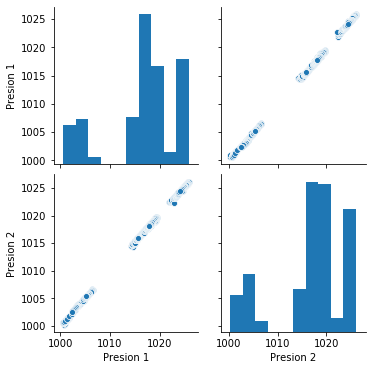

In [26]:
sns.pairplot(dataset) 
#Observando los graficos a continuacion, la relacion de La presion 1 en funcion de la Presion 2 y viceversa, resulta ser una Relación lineal positiva fuerte, indicando de esta manera que podemos hacer uso del algoritmo de Regresion Lineal.

In [27]:
#Se procede a ver la correlacion entre las variables del modelo, en este caso Presion 1 y Presion 2
#Observando el dataframe generado, se puede verificar que P1 en funcion de p2 y P2 en funcion de p1 la correlacion es casi 1, representando un 99,9%.
pearson_corr = dataset.corr(method='pearson')
pearson_corr

,Presion 1,Presion 2
Presion 1,1.000000,0.999862
Presion 2,0.999862,1.000000


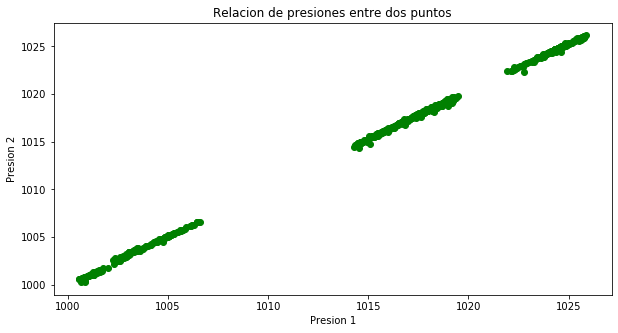

In [28]:
X = dataset["Presion 1"]
y = dataset["Presion 2"]

#A continuación, Se procede a ver la relacion de las presiones p1(p2) para ver si representa un comportamiento lineal
plt.figure(figsize = (10,5))
plt.scatter(X, y, color = 'g')
plt.title('Relacion de presiones entre dos puntos')
plt.xlabel('Presion 1')
plt.ylabel('Presion 2')
plt.show()

#Efectivamente puede comprobarse que la relacion entre ambos puntos sigue un comportamiento lineal y la tasa de error es muy baja, ya que la distancia entre ambos puntos es minima

### Implementación del Modelo de Regresión Lineal Simple

In [29]:
# Se reacomodan los valores para usar el modelo LinearRegression()
X = X.values.reshape(-1,1)
y = y.values.reshape(-1,1)

# A continuación se indica que el 30% de los datos serán datos de prueba 
# y el resto permanece en el conjunto de entrenamiento.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

#Defino el algoritmo a utilizar
lr = linear_model.LinearRegression()

#Se ajusta al algoritmo
lr.fit(X_train, y_train)

#Realizo una prediccion con los datos de prueba
Y_pred = lr.predict(X_test)

In [36]:
#Calcular los datos de la pendiente o el coeficiente (a) y la interseccion (b) -> y = ax + b
print("Datos del modelo de Regresion Lineal Simple")

print("\nValor de la pendiente o oeficiente 'a': ")
a = lr.coef_
print(a)

print("\nValor de la interseccion: ")
b = lr.intercept_
print(b)

print("\nLa Ecuacion del modelo es: ")
print('Y = ', a[0][0], 'X' ,b[0])

print("\nPrecision del modelo: ")
print(lr.score(X_train, y_train))
#Como la precision del modelo es del 0.99.. casi 1 quiere decir que la prediccion del modelo se comporta de manera lineal por lo tanto se puede predecir correctamente la variable p1 en funcion de p2


Datos del modelo de Regresion Lineal Simple

Valor de la pendiente o oeficiente 'a': 
[[1.01291516]]

Valor de la interseccion: 
[-12.8678876]

La Ecuacion del modelo es: 
Y =  1.0129151587244347 X -12.867887601781945

Precision del modelo: 
0.9997287331486203


In [35]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
mse = mean_squared_error(y_test, Y_pred)
print("Error Cuadratico medio (mse): ", mse)
rmse = np.sqrt(mse)

#Como puede observarse a continuación el error cuadratico medio es del 0.015 casi nulo, indicando que la diferencia entre ambos puntos es minima dando soporte a las conclusiones arribadas anteriormente sobre el comporatmiento lineal del modelo

Error Cuadratico medio (mse):  0.015038281404435052


##### se grafica los valores reales del entrenamiento y los valores predecidos del entrenamiento

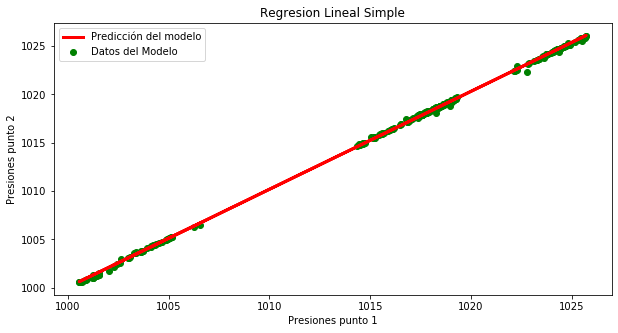

In [47]:
plt.figure(figsize = (10,5))
plt.scatter(X_test, y_test,  color='green', label="Datos del Modelo")
plt.plot(X_test, Y_pred, color='red', linewidth=3, label = "Predicción del modelo" )
plt.title('Regresion Lineal Simple')
plt.xlabel('Presiones punto 1')
plt.ylabel('Presiones punto 2')
plt.legend(loc="upper left")
plt.show()

In [41]:
print(dataset.describe()) 

#La media de la presion 1 es 1016,58. El desvio standar es 6,96, lo que significa que la mayoria de las mediciones
#de la presionA se encuentran entre 1009,62 y 1023,54

#La media de la presion 2 es 1016,84.El desvio standar es 7,05, lo que significa que la mayoria de las mediciones
#de la presionB se encuentran entre 1009.79 y 1023.89

         Presion 1    Presion 2
count   999.000000   999.000000
mean   1016.580450  1016.841832
std       6.962852     7.058162
min    1000.560000  1000.240000
25%    1015.375000  1015.685000
50%    1017.940000  1018.280000
75%    1019.190000  1019.485000
max    1025.880000  1026.150000
